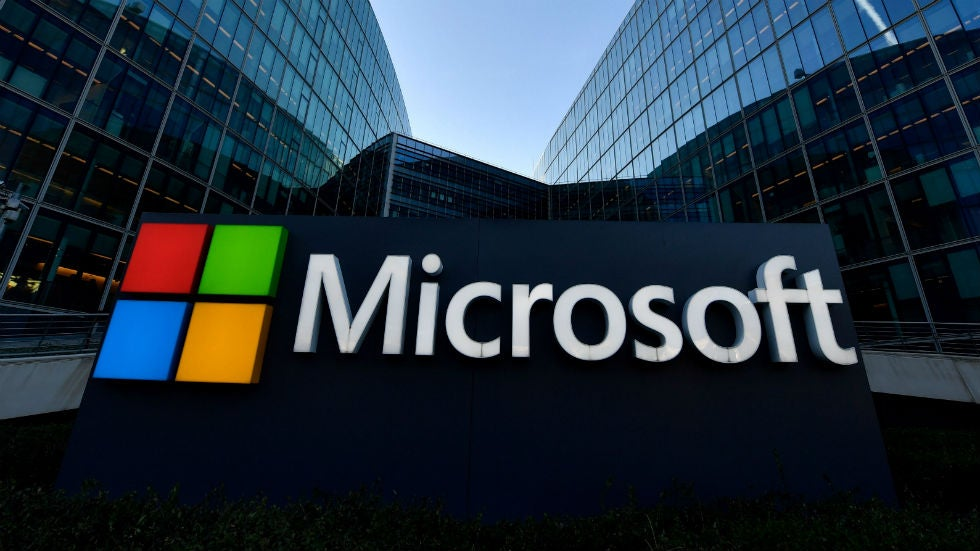

# Microsoft Movie Analysis

# Overview

Microsoft is interested in analyzing if the production budget has a relationship or affect with a movie's average rating, popularity, and profit. They hope to conclude production budget is a significant variable in having a successful movie. 

# Bussiness Problem

Microsoft would like to have a production budget less than $100 million while having a successful movie. Microsoft has minimum values for  average rating(7.5), popularity(12.693), and profit(150%) for what they consider a “success” in each category. We will compare production budget relation on average rating, popularity, and profit separately to observe relation and trends. 

# Data

 - Microsoft has given data on movies on past movies to analyze budget. Extracted data used on movie’s budgets under 100 million and compared to:
     - Average ratings with minimum rating of 7.5 and number of votes 10,000,   
     - Popularity more than 12.693 (the top 75% rated values)
     - Worldwide gross to calculate profit more than 150%


#     Setting files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob
import warnings
warnings.filterwarnings('ignore')

In [2]:
files_csv = glob('Data/*.csv.gz')
files_csv

['Data\\bom.movie_gross.csv.gz',
 'Data\\imdb.name.basics.csv.gz',
 'Data\\imdb.title.akas.csv.gz',
 'Data\\imdb.title.basics.csv.gz',
 'Data\\imdb.title.crew.csv.gz',
 'Data\\imdb.title.principals.csv.gz',
 'Data\\imdb.title.ratings.csv.gz',
 'Data\\tmdb.movies.csv.gz',
 'Data\\tn.movie_budgets.csv.gz']

In [3]:
csv_files_dict = {}
for filename in files_csv:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

In [4]:
for c in csv_files_dict.keys():
    csv_files_dict[c].reset_index(inplace=True)

In [5]:
csv_files_dict.keys()

dict_keys(['bom_movie_gross_gz', 'imdb_name_basics_gz', 'imdb_title_akas_gz', 'imdb_title_basics_gz', 'imdb_title_crew_gz', 'imdb_title_principals_gz', 'imdb_title_ratings_gz', 'tmdb_movies_gz', 'tn_movie_budgets_gz'])

In [6]:
for c in csv_files_dict.keys():
    print(c)
    print(csv_files_dict[c].info())

bom_movie_gross_gz
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None
imdb_name_basics_gz
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_

In [7]:
for c in csv_files_dict.keys():
    csv_files_dict[c].reset_index(inplace=True)

In [8]:
#setting columns to variables
budgets = csv_files_dict['tn_movie_budgets_gz']
titles = csv_files_dict['imdb_title_basics_gz']
ratings = csv_files_dict['imdb_title_ratings_gz']
popularity= csv_files_dict['tmdb_movies_gz']

In [9]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              5782 non-null   int64 
 1   id                 5782 non-null   int64 
 2   release_date       5782 non-null   object
 3   movie              5782 non-null   object
 4   production_budget  5782 non-null   object
 5   domestic_gross     5782 non-null   object
 6   worldwide_gross    5782 non-null   object
dtypes: int64(2), object(5)
memory usage: 316.3+ KB


# Budgets to Rating

In [10]:
#merging title and ratings to be able to merge with budgets
title_ratings = pd.merge(titles, ratings, left_on='tconst', right_on = 'tconst', how= 'inner' )
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index_x          73856 non-null  int64  
 1   tconst           73856 non-null  object 
 2   primary_title    73856 non-null  object 
 3   original_title   73856 non-null  object 
 4   start_year       73856 non-null  int64  
 5   runtime_minutes  66236 non-null  float64
 6   genres           73052 non-null  object 
 7   index_y          73856 non-null  int64  
 8   averagerating    73856 non-null  float64
 9   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 6.2+ MB


In [11]:
# rid of unnecessary columns
title_ratings.drop(columns=[
    'index_x',
    'index_y',
    'original_title',
    'start_year',
    'runtime_minutes',
    'genres'
], 
              inplace=True)
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   primary_title  73856 non-null  object 
 2   averagerating  73856 non-null  float64
 3   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
#finding movies with a minimum number of votes oer 10000
title_ratings = title_ratings[title_ratings['numvotes']>=10000]
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 31 to 73388
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         2678 non-null   object 
 1   primary_title  2678 non-null   object 
 2   averagerating  2678 non-null   float64
 3   numvotes       2678 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 104.6+ KB


In [13]:
title_ratings = title_ratings[title_ratings['averagerating']>=7.5]
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 61 to 70321
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         455 non-null    object 
 1   primary_title  455 non-null    object 
 2   averagerating  455 non-null    float64
 3   numvotes       455 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 17.8+ KB


In [14]:
budgets['production_budget']= budgets['production_budget'].str.replace(",", "")
budgets['production_budget']= budgets['production_budget'].str.replace("$", "")

In [15]:
#changing production_budget to float
budgets['production_budget'] = budgets['production_budget'].astype(float)

In [16]:
budgets_lt_100mil = budgets[budgets['production_budget']<100000000]
budgets_lt_100mil

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
406,406,7,"Nov 6, 2015",The Peanuts Movie,99000000.0,"$130,178,411","$250,091,610"
407,407,8,"Feb 8, 2019",The LEGO Movie 2: The Second Part,99000000.0,"$105,806,508","$190,325,698"
408,408,9,"Nov 21, 2018",Robin Hood,99000000.0,"$30,824,628","$84,747,441"
409,409,10,"May 4, 2001",The Mummy Returns,98000000.0,"$202,007,640","$435,040,395"
410,410,11,"Dec 20, 2002",Gangs of New York,97000000.0,"$77,730,500","$183,124,621"
...,...,...,...,...,...,...,...
5777,5777,78,"Dec 31, 2018",Red 11,7000.0,$0,$0
5778,5778,79,"Apr 2, 1999",Following,6000.0,"$48,482","$240,495"
5779,5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,"$1,338","$1,338"
5780,5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,$0,$0


In [17]:
#merging title_ratings and popularity
budgets_rating= pd.merge(title_ratings, budgets_lt_100mil, left_on='primary_title', right_on = 'movie', how= 'inner' )
budgets_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 125
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             126 non-null    object 
 1   primary_title      126 non-null    object 
 2   averagerating      126 non-null    float64
 3   numvotes           126 non-null    int64  
 4   index              126 non-null    int64  
 5   id                 126 non-null    int64  
 6   release_date       126 non-null    object 
 7   movie              126 non-null    object 
 8   production_budget  126 non-null    float64
 9   domestic_gross     126 non-null    object 
 10  worldwide_gross    126 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 11.8+ KB


In [18]:
# rid of unnecessary columns
budgets_rating.drop(columns=[
    'release_date',
    'index',
    'movie',
    'domestic_gross'
], 
              inplace=True)

In [19]:
budgets_rating[['production_budget','averagerating']].describe()

,production_budget,averagerating
count,1.260000e+02,126.000000
mean,2.518643e+07,7.796032
std,2.226968e+07,0.252476
min,1.000000e+05,7.500000
25%,8.750000e+06,7.600000
50%,1.800000e+07,7.700000
75%,3.700000e+07,8.000000
max,9.400000e+07,8.500000


In [20]:
budgets_rating[['production_budget','averagerating']].corr()

,production_budget,averagerating
production_budget,1.000000,-0.066027
averagerating,-0.066027,1.000000


In [21]:
br_sort = budgets_rating[['production_budget','averagerating']].sort_values(by='production_budget', ascending=False)
br_sort

,production_budget,averagerating
82,94000000.0,7.7
27,93000000.0,7.6
39,90000000.0,7.8
35,84000000.0,7.6
18,80000000.0,8.1
...,...,...
118,1000000.0,7.8
70,1000000.0,8.2
68,900000.0,7.5
47,190000.0,7.6


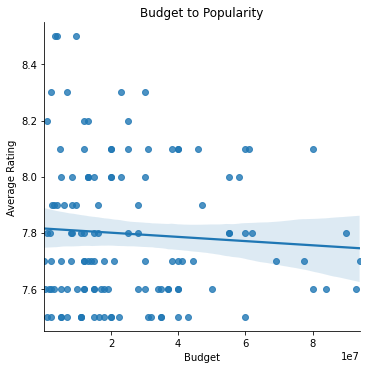

In [22]:
#scatter plot of the top 100
sns.lmplot(x='production_budget', y='averagerating', data=br_sort);
plt.title('Budget to Popularity')
plt.xlabel("Budget")
plt.ylabel("Average Rating");

There appears to be no relation between the top 100 production budgets under 100 million and average ratings with a number of votes at least 10,000.

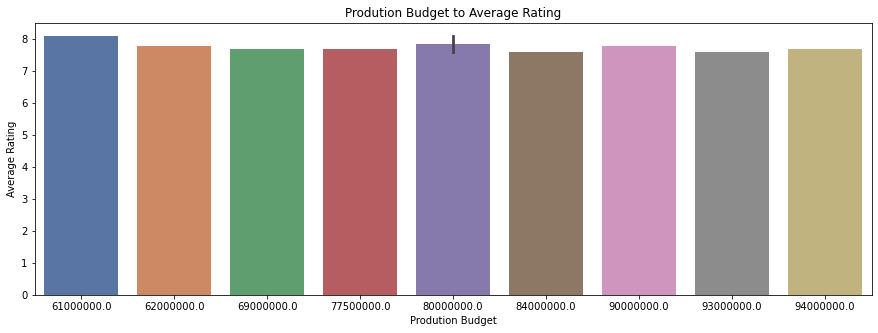

In [23]:
#a plot
plt.figure(figsize=(15,5))
plt.title("Prodution Budget to Average Rating")
sns.barplot(palette="deep", x=br_sort['production_budget'][:10], y=br_sort['averagerating']);
plt.xlabel("Prodution Budget")
plt.ylabel("Average Rating");

Looking at the top 10, as expected from the correlation above, production budget appears to have no trend on a movies average rating. 

# Budget to Popularity

In [24]:
#merge title_ratings merge with budgets by primary_title and movie(title)
pop_budg = pd.merge(popularity, budgets_lt_100mil, left_on='title', right_on = 'movie', how= 'inner' )
pop_budg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   level_0            2117 non-null   int64  
 1   index_x            2117 non-null   int64  
 2   genre_ids          2117 non-null   object 
 3   id_x               2117 non-null   int64  
 4   original_language  2117 non-null   object 
 5   original_title     2117 non-null   object 
 6   popularity         2117 non-null   float64
 7   release_date_x     2117 non-null   object 
 8   title              2117 non-null   object 
 9   vote_average       2117 non-null   float64
 10  vote_count         2117 non-null   int64  
 11  index_y            2117 non-null   int64  
 12  id_y               2117 non-null   int64  
 13  release_date_y     2117 non-null   object 
 14  movie              2117 non-null   object 
 15  production_budget  2117 non-null   float64
 16  domestic_gross     2117 

In [25]:
pop_budg.drop(columns=[
    'level_0',
    'index_x',
    'genre_ids',
    'original_language',
    'original_title',
    'index_y',
    'id_x',
    'release_date_x',
    'release_date_y',
    'movie',
    'domestic_gross',
    'id_y',
    'vote_average',
    'vote_count'
], 
              inplace=True)
pop_budg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   popularity         2117 non-null   float64
 1   title              2117 non-null   object 
 2   production_budget  2117 non-null   float64
 3   worldwide_gross    2117 non-null   object 
dtypes: float64(2), object(2)
memory usage: 82.7+ KB


In [26]:
top_pop_75 = pop_budg[pop_budg['popularity']>=pop_budg['popularity'].describe()[6]]
top_pop_75.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530 entries, 0 to 2078
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   popularity         530 non-null    float64
 1   title              530 non-null    object 
 2   production_budget  530 non-null    float64
 3   worldwide_gross    530 non-null    object 
dtypes: float64(2), object(2)
memory usage: 20.7+ KB


In [27]:
#popularity budget sorted by top 100 production budget
pop_budg_sort = top_pop_75[['production_budget', 'popularity']].sort_values(by='production_budget',ascending=False)
pop_budg_sort

,production_budget,popularity
23,99000000.0,39.975
21,99000000.0,15.444
1854,97000000.0,24.651
825,95000000.0,29.056
1370,95000000.0,22.856
...,...,...
883,1000000.0,13.670
2048,1000000.0,17.861
612,850000.0,16.673
543,500000.0,12.835


In [28]:
pop_budg_sort[['production_budget', 'popularity']].describe()

,production_budget,popularity
count,5.300000e+02,530.000000
mean,3.797665e+07,17.786915
std,2.572697e+07,5.759895
min,3.250000e+05,12.693000
25%,1.700000e+07,14.205250
50%,3.500000e+07,16.027000
75%,5.737500e+07,19.098750
max,9.900000e+07,78.123000


In [29]:
pop_budg_sort[['production_budget', 'popularity']].corr()

,production_budget,popularity
production_budget,1.000000,0.136046
popularity,0.136046,1.000000


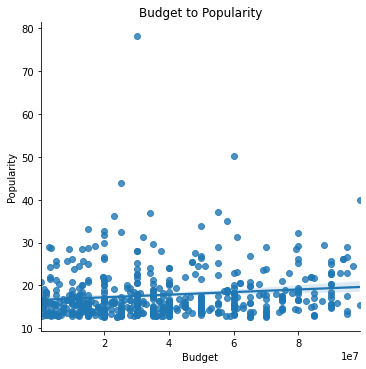

In [30]:
sns.lmplot(x='production_budget', y='popularity', data=pop_budg_sort)
plt.title('Budget to Popularity')
plt.xlabel("Budget")
plt.ylabel("Popularity");

There appears to be no relationship between a movies production budget under 100 million and popularity. 

In [31]:
pop_budg_sort.describe()

,production_budget,popularity
count,5.300000e+02,530.000000
mean,3.797665e+07,17.786915
std,2.572697e+07,5.759895
min,3.250000e+05,12.693000
25%,1.700000e+07,14.205250
50%,3.500000e+07,16.027000
75%,5.737500e+07,19.098750
max,9.900000e+07,78.123000


In [32]:
pop_budg_sort.corr()

,production_budget,popularity
production_budget,1.000000,0.136046
popularity,0.136046,1.000000


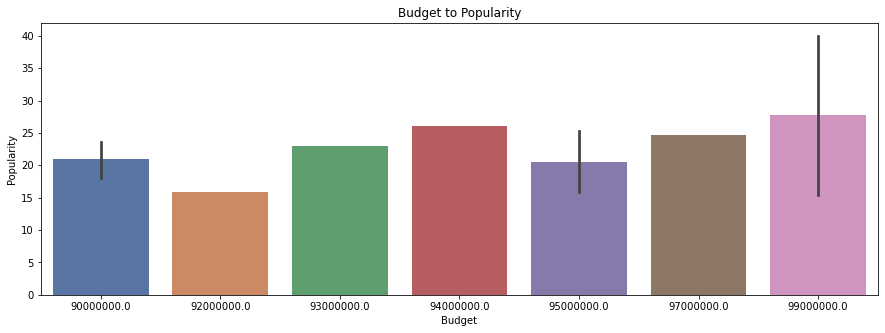

In [33]:
plt.figure(figsize=(15,5))
plt.title("Budget to Popularity")
sns.barplot(palette="deep", x=pop_budg_sort['production_budget'][:20], y=pop_budg_sort['popularity']);
plt.xlabel("Budget")
plt.ylabel("Popularity");

Looking at the top 20, as expected from the correlation above, production budget appears to have no trend on popularity. 

# Budget to Profit

In [34]:
csv_files_dict['bom_movie_gross_gz'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           3387 non-null   int64  
 1   title           3387 non-null   object 
 2   studio          3382 non-null   object 
 3   domestic_gross  3359 non-null   float64
 4   foreign_gross   2037 non-null   object 
 5   year            3387 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 158.9+ KB


In [35]:
gross = csv_files_dict['bom_movie_gross_gz']

In [36]:
gross['foreign_gross']= gross['foreign_gross'].str.replace(",", "")
gross['foreign_gross']= gross['foreign_gross'].str.replace("$", "")

In [37]:
gross['foreign_gross'] = gross['foreign_gross'].astype(float)

In [38]:
gross['worldwide_gross'] = gross['domestic_gross'] + gross['foreign_gross']
gross['worldwide_gross']

0       1.067000e+09
1       1.025500e+09
2       9.603000e+08
3       8.283000e+08
4       7.526000e+08
            ...     
3382             NaN
3383             NaN
3384             NaN
3385             NaN
3386             NaN
Name: worldwide_gross, Length: 3387, dtype: float64

In [39]:
gross.dropna(subset=['worldwide_gross'], inplace=True)
gross['worldwide_gross']

0       1.067000e+09
1       1.025500e+09
2       9.603000e+08
3       8.283000e+08
4       7.526000e+08
            ...     
3275    1.501400e+06
3286    9.540000e+05
3309    2.660000e+05
3342    9.840000e+04
3353    7.320000e+04
Name: worldwide_gross, Length: 2009, dtype: float64

In [40]:
gross_budget = pd.merge(gross, budgets_lt_100mil, left_on='index', right_on='index', how='left')
gross_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              2009 non-null   int64  
 1   title              2009 non-null   object 
 2   studio             2007 non-null   object 
 3   domestic_gross_x   2009 non-null   float64
 4   foreign_gross      2009 non-null   float64
 5   year               2009 non-null   int64  
 6   worldwide_gross_x  2009 non-null   float64
 7   id                 1622 non-null   float64
 8   release_date       1622 non-null   object 
 9   movie              1622 non-null   object 
 10  production_budget  1622 non-null   float64
 11  domestic_gross_y   1622 non-null   object 
 12  worldwide_gross_y  1622 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 219.7+ KB


In [41]:
gross_budget.drop(columns=[
    'studio',
    'index', 
    'domestic_gross_x', 
    'domestic_gross_y',
    'foreign_gross',  
    'year',
    'release_date',
    'movie',
    'id',
    'worldwide_gross_y',
    'title'
], 
                 inplace=True)

In [42]:
gross_budget['worldwide_gross'] = gross_budget['worldwide_gross_x']

In [43]:
gross_budget.drop(columns=['worldwide_gross_x'])

,production_budget,worldwide_gross
0,NaN,1.067000e+09
1,NaN,1.025500e+09
2,NaN,9.603000e+08
3,NaN,8.283000e+08
4,NaN,7.526000e+08
...,...,...
2004,13000000.0,1.501400e+06
2005,13000000.0,9.540000e+05
2006,13000000.0,2.660000e+05
2007,12000000.0,9.840000e+04


In [44]:
gross_budget['worldwide_profit'] = gross_budget['worldwide_gross']-gross_budget['production_budget']

In [45]:
gross_budget['profit_percentage']= (gross_budget['worldwide_profit']/ gross_budget['production_budget'])*100
gross_budget['profit_percentage']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2004   -88.450769
2005   -92.661538
2006   -97.953846
2007   -99.180000
2008   -99.390000
Name: profit_percentage, Length: 2009, dtype: float64

In [46]:
gross_budget['profit_percentage'].describe()

count    1622.000000
mean      355.455788
std       925.881822
min       -99.993000
25%       -75.564904
50%        18.285714
75%       341.222222
max      8880.000000
Name: profit_percentage, dtype: float64

In [47]:
gross_budget = gross_budget[gross_budget['profit_percentage']>=150]
gross_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 600 to 1941
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   worldwide_gross_x  578 non-null    float64
 1   production_budget  578 non-null    float64
 2   worldwide_gross    578 non-null    float64
 3   worldwide_profit   578 non-null    float64
 4   profit_percentage  578 non-null    float64
dtypes: float64(5)
memory usage: 27.1 KB


In [48]:
gross_budget = gross_budget.dropna(subset=['profit_percentage'])
gross_budget

,worldwide_gross_x,production_budget,worldwide_gross,worldwide_profit,profit_percentage
600,1.518900e+09,70000000.0,1.518900e+09,1.448900e+09,2069.857143
601,1.108600e+09,70000000.0,1.108600e+09,1.038600e+09,1483.714286
602,1.084900e+09,70000000.0,1.084900e+09,1.014900e+09,1449.857143
603,1.021100e+09,70000000.0,1.021100e+09,9.511000e+08,1358.714286
604,8.772000e+08,70000000.0,8.772000e+08,8.072000e+08,1153.142857
...,...,...,...,...,...
1937,4.050000e+07,14000000.0,4.050000e+07,2.650000e+07,189.285714
1938,3.920000e+07,14000000.0,3.920000e+07,2.520000e+07,180.000000
1939,3.820000e+07,14000000.0,3.820000e+07,2.420000e+07,172.857143
1940,3.537080e+07,14000000.0,3.537080e+07,2.137080e+07,152.648571


In [49]:
gross_budget_sort = gross_budget.sort_values(by='profit_percentage', ascending=False)
gross_budget_sort

,worldwide_gross_x,production_budget,worldwide_gross,worldwide_profit,profit_percentage
1837,1.347000e+09,15000000.0,1.347000e+09,1.332000e+09,8880.000000
1838,1.309500e+09,15000000.0,1.309500e+09,1.294500e+09,8630.000000
1839,1.242800e+09,15000000.0,1.242800e+09,1.227800e+09,8185.333333
1840,1.147800e+09,15000000.0,1.147800e+09,1.132800e+09,7552.000000
1659,1.332600e+09,18500000.0,1.332600e+09,1.314100e+09,7103.243243
...,...,...,...,...,...
1940,3.537080e+07,14000000.0,3.537080e+07,2.137080e+07,152.648571
901,1.261000e+08,50000000.0,1.261000e+08,7.610000e+07,152.200000
902,1.255000e+08,50000000.0,1.255000e+08,7.550000e+07,151.000000
1941,3.510000e+07,14000000.0,3.510000e+07,2.110000e+07,150.714286


In [50]:
gross_budget_sort['profit_percentage'] = round(gross_budget_sort['profit_percentage'], 2)

In [51]:
gross_budget_sort[['profit_percentage', 'production_budget']].describe()

,profit_percentage,production_budget
count,578.000000,5.780000e+02
mean,1058.238339,3.014325e+07
std,1277.342372,1.584504e+07
min,150.000000,1.400000e+07
25%,292.312500,1.800000e+07
50%,554.945000,2.400000e+07
75%,1307.870000,4.000000e+07
max,8880.000000,7.000000e+07


In [52]:
gross_budget_sort[['profit_percentage', 'production_budget']].corr()

,profit_percentage,production_budget
profit_percentage,1.000000,-0.247823
production_budget,-0.247823,1.000000


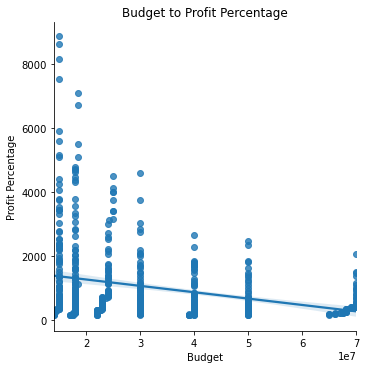

In [53]:
sns.lmplot(x='production_budget', y='profit_percentage', data=gross_budget_sort);
plt.title('Budget to Profit Percentage')
plt.xlabel("Budget")
plt.ylabel("Profit Percentage");

There appears to be no relationship, maybe even a weak negative trend, between a movies production budget under 100 million and profit percentage. 

In [54]:
gross_budget_sort[['profit_percentage', 'production_budget']].describe()

,profit_percentage,production_budget
count,578.000000,5.780000e+02
mean,1058.238339,3.014325e+07
std,1277.342372,1.584504e+07
min,150.000000,1.400000e+07
25%,292.312500,1.800000e+07
50%,554.945000,2.400000e+07
75%,1307.870000,4.000000e+07
max,8880.000000,7.000000e+07


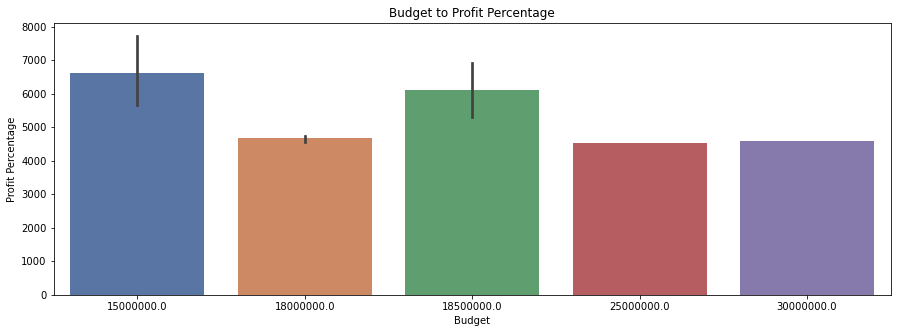

In [55]:
plt.figure(figsize=(15,5))
plt.title("Budget to Profit Percentage")
sns.barplot(palette= "deep", x='production_budget', y='profit_percentage', data=gross_budget_sort[:20]);
plt.xlabel("Budget")
plt.ylabel("Profit Percentage");

Looking at the top 20, as expected from the correlation above, production budget appears to have no trend on profit percentage. 

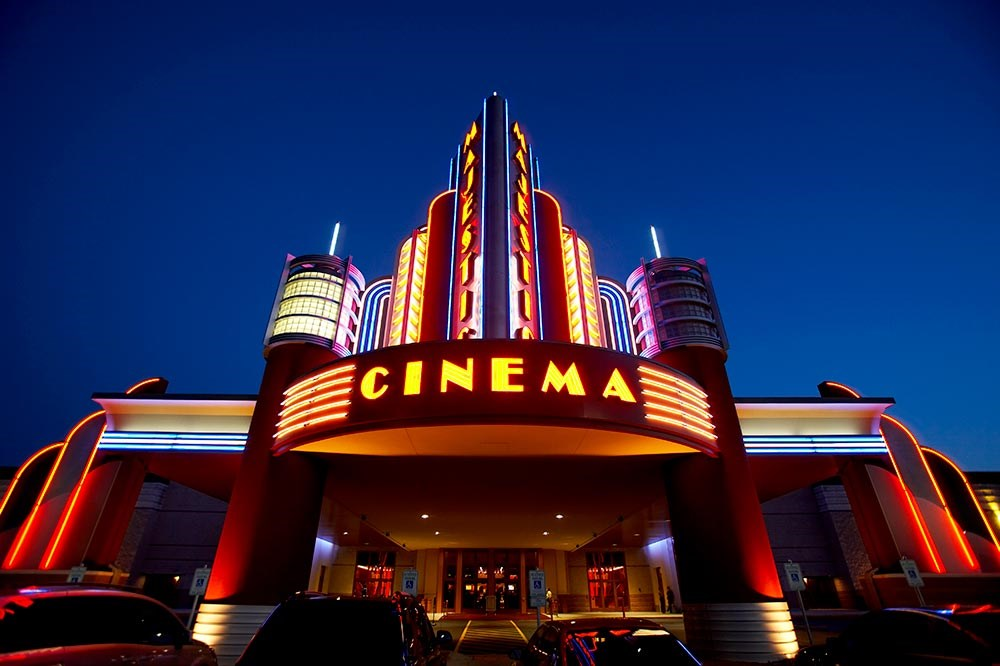

# Conclusion

Looking into budgets under 100 million dollars, it has no effect or relation to average rating, popularity, and profit.
   - Budget has no relation or trend to a movie’s 7.5 average rating . 
   - Budget has no relation or trend to a movie’s popularity. 
   - Budget has no relation or trend to a movie’s a profit percentage..


## Next Steps

Though production budget showed no relation or effect on the subjects analyzed. Further analysis on production budget could show its value to predicting a successful movie.
 - Analyze other variables in relation to average rating, popularity, and profit.
 - Determine other possible variables as indicators for a successful movie.
 - Find which studio has the highest average rating, popularity, and profit collectively with production budget. 
 
